![logo](banner.jpg)

<h1><center><span style="color:blue">TASCA 9 - IT Academy</span></center></h1>
<h2><center><span style="color:blue">Curs Data Science</span></center></h2>

In [130]:
import pandas as pd
import numpy as np
from numpy import random
import pandas as pd
from datetime import datetime
import statistics as stat
import seaborn as sns
import matplotlib.pyplot as plt

In [131]:
file = pd.read_csv('PGATour.csv')
file.head()

,Player,EVENTS_PLAYED,POINTS,NUMBER_OF_WINS,NUMBER_OF_TOP_Tens,POINTS_BEHIND_LEAD,ROUNDS_PLAYED,SG_PUTTING_PER_ROUND,TOTAL_SG:PUTTING,MEASURED_ROUNDS,...,AVG_CARRY_DISTANCE,LONGEST_CARRY_DISTANCE,SHORTEST_CARRY_DISTANCE,AVG_SCORE,TOTAL_STROKES,TOTAL_ROUNDS,MAKES_BOGEY%,BOGEYS_MADE,HOLES_PLAYED,AGE
0,Aaron Baddeley,27.0,342.0,0.0,1.0,5275.0,84.0,-0.062,-4.064,66.0,...,278.2,312.6,237.1,70.850,5518.0,78.0,16.24,228.0,1404.0,37.0
1,Aaron Wise,27.0,1498.0,1.0,4.0,4119.0,82.0,0.245,17.134,70.0,...,282.5,314.6,255.7,70.276,5888.0,84.0,16.53,250.0,1512.0,22.0
2,Abraham Ancer,29.0,909.0,0.0,5.0,4708.0,94.0,-0.052,-4.076,79.0,...,275.1,305.8,223.5,70.659,6745.0,96.0,14.76,255.0,1728.0,27.0
3,Adam Hadwin,24.0,1054.0,0.0,3.0,4563.0,88.0,0.145,8.729,60.0,...,277.7,307.7,246.9,70.750,6280.0,89.0,15.61,250.0,1602.0,30.0
4,Adam Schenk,28.0,239.0,0.0,1.0,5378.0,86.0,0.130,8.558,66.0,...,283.0,305.0,236.8,71.370,5683.0,80.0,16.88,243.0,1440.0,26.0


In [132]:
file.shape

(331, 69)

In [133]:
file.columns

Index(['Player', 'EVENTS_PLAYED', 'POINTS', 'NUMBER_OF_WINS',
       'NUMBER_OF_TOP_Tens', 'POINTS_BEHIND_LEAD', 'ROUNDS_PLAYED',
       'SG_PUTTING_PER_ROUND', 'TOTAL_SG:PUTTING', 'MEASURED_ROUNDS',
       'AVG_Driving_DISTANCE', 'UP_AND_DOWN_%', 'PAR_OR_BETTER', 'MISSED_GIR',
       'FAIRWAY_HIT_%', 'FAIRWAYS_HIT', 'POSSIBLE_FAIRWAYS', 'GIR_RANK',
       'GOING_FOR_GREEN_IN_2%', 'ATTEMPTS_GFG', 'NON-ATTEMPTS_GFG',
       'RTP-GOING_FOR_THE_GREEN', 'RTP-NOT_GOING_FOR_THE_GRN', 'HOLE_OUTS',
       'SAND_SAVE%', 'NUMBER_OF_SAVES', 'NUMBER_OF_BUNKERS', 'TOTAL_O/U_PAR',
       'Three_PUTT%', 'TOTAL_3_PUTTS', 'SG_PER_ROUND', 'SG:OTT', 'SG:APR',
       'SG:ARG', 'DRIVES_320+%', 'TOTAL_DRIVES_FOR_320+', 'TOTAL_DRIVES',
       'ROUGH_TENDNECY%', 'TOTAL_ROUGH', 'FAIRWAY_BUNKER%',
       'TOTAL_FAIRWAY_BUNKERS', 'AVG_CLUB_HEAD_SPEED', 'FASTEST_CH_SPEED',
       'SLOWEST_CH_SPEED', 'AVG_BALL_SPEED', 'FASTEST_BALL_SPEED',
       'SLOWEST_BALL_SPEED', 'AVG_SMASH_FACTOR', 'HIGHEST_SF', 'LOWEST_SF',

In [134]:
# Como el dataset tiene muchísimas columnas, vamos a reducir el daset a 7 columnas en total para que sea más oprativo

df=file[['Player', 'AGE','EVENTS_PLAYED', 'NUMBER_OF_WINS', 'NUMBER_OF_TOP_Tens', 'ROUNDS_PLAYED', 'BOGEYS_MADE']].copy()

In [135]:
df.shape

(331, 7)

In [136]:
file = df.rename(columns = {'AGE': 'Age', 'BOGEYS_MADE': 'Bogeys_Made', 'EVENTS_PLAYED':'Events_Played',
                                           'NUMBER_OF_TOP_Tens':'Top10_Made', 'NUMBER_OF_WINS': 'Total_Wins', 'ROUNDS_PLAYED':
                                           'Rounds_Played'}, inplace = False)

In [137]:
file=pd.DataFrame(file)

In [138]:
file.head()

,Player,Age,Events_Played,Total_Wins,Top10_Made,Rounds_Played,Bogeys_Made
0,Aaron Baddeley,37.0,27.0,0.0,1.0,84.0,228.0
1,Aaron Wise,22.0,27.0,1.0,4.0,82.0,250.0
2,Abraham Ancer,27.0,29.0,0.0,5.0,94.0,255.0
3,Adam Hadwin,30.0,24.0,0.0,3.0,88.0,250.0
4,Adam Schenk,26.0,28.0,0.0,1.0,86.0,243.0


In [139]:
type(file)

pandas.core.frame.DataFrame

In [140]:
file.shape

(331, 7)

In [141]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331 entries, 0 to 330
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player         195 non-null    object 
 1   Age            195 non-null    float64
 2   Events_Played  195 non-null    float64
 3   Total_Wins     195 non-null    float64
 4   Top10_Made     195 non-null    float64
 5   Rounds_Played  195 non-null    float64
 6   Bogeys_Made    195 non-null    float64
dtypes: float64(6), object(1)
memory usage: 18.2+ KB


### <span style="color:black">Exercici 1.</span>

__Agafa un conjunt de dades de tema esportiu que t'agradi i selecciona un atribut del conjunt de dades. Calcula la moda, la mediana, la desviació estàndard i la mitjana aritmètica:__ <span style="color:blue">__[X] Fet__</span>

In [16]:
# MODA 

In [93]:
moda=stat.mode(file['Age'])
moda

34.0

In [11]:
# MEDIANA

In [94]:
median=file['Age'].median()
median

33.0

In [13]:
# DESVIACIÓN ESTANDARD

In [95]:
desviacionstd=file['Age'].std()
desviacionstd

5.6684685602139275

In [15]:
# MEDIA ARITMÉTICA

In [96]:
media=file['Age'].mean()
media

32.88717948717949

### <span style="color:black">Exercici 2.</span>

__Continuant amb les dades de tema esportiu, selecciona dos atributs i calcula'n la seva correlació. :__ <span style="color:blue">__[X] Fet__</span>


In [142]:
corr_mat = file.corr()
corr_mat.loc["Events_Played", "Rounds_Played"]

0.833210378329346

In [ ]:
# Es obvio que hay una correlación alta entre el número de eventos jugados y el número de rounds jugados: a mayor número de 
# eventos, mayor es el número de Rounds jugados.

### <span style="color:black">Exercici 3.</span>

__Continuant amb les dades de tema esportiu, calcula la correlació de tots els atributs entre sí i representa'ls en una matriu amb diferents colors d'intensitat:__ <span style="color:blue">__[X] Fet__</span>

In [ ]:
# Vamos a observar si existe o no correlación entre los atributos

In [123]:
corr_mat = file.corr()
corr_mat

,Age,Events_Played,Total_Wins,Top10_Made,Rounds_Played,Bogeys_Made
Age,1.000000,-0.161896,-0.086034,-0.107258,-0.125666,-0.172883
Events_Played,-0.161896,1.000000,-0.203434,-0.102154,0.833210,0.850630
Total_Wins,-0.086034,-0.203434,1.000000,0.525058,-0.036069,-0.121100
Top10_Made,-0.107258,-0.102154,0.525058,1.000000,0.258735,0.055089
Rounds_Played,-0.125666,0.833210,-0.036069,0.258735,1.000000,0.828363
Bogeys_Made,-0.172883,0.850630,-0.121100,0.055089,0.828363,1.000000


In [19]:
# Observamos que no existe correlación entre la mayoría de atributos excepto los que la lógica nos dice que estarían 
# relacionados: por ejemplo, cuanto mayor es el número de eventos en los que ha participado un jugador, mayor es el número
# de bogeys que ha realizado o mayor es también el número de Rounds que ha jugado. Por otro lado, observamos que la edad de 
# un jugador no tiene prácticamente incidencia sobre su número de victorias o con el número de Top Tens que ha logrado.

In [109]:
DF=pd.DataFrame(corr_mat)

In [110]:
DF.head()

,Age,Events_Played,Total_Wins,Top10_Made,Rounds_Played,Bogeys_Made
Age,1.000000,-0.161896,-0.086034,-0.107258,-0.125666,-0.172883
Events_Played,-0.161896,1.000000,-0.203434,-0.102154,0.833210,0.850630
Total_Wins,-0.086034,-0.203434,1.000000,0.525058,-0.036069,-0.121100
Top10_Made,-0.107258,-0.102154,0.525058,1.000000,0.258735,0.055089
Rounds_Played,-0.125666,0.833210,-0.036069,0.258735,1.000000,0.828363


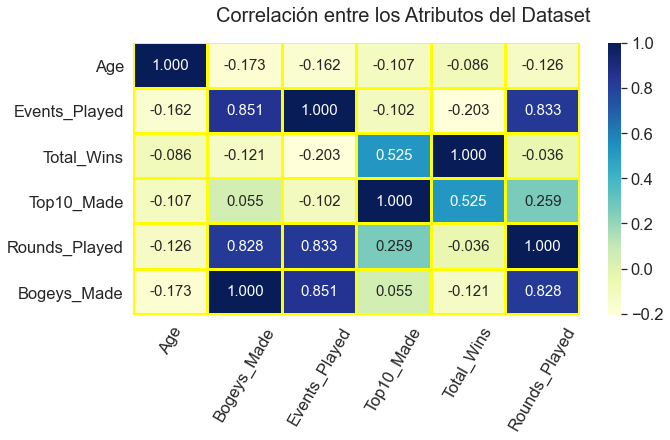

In [120]:
file_plot= pd.DataFrame(DF, columns=['Age','Bogeys_Made','Events_Played',"Top10_Made",'Total_Wins','Rounds_Played'])
sns.set(rc={'figure.figsize':(10,5)}, font_scale=1.5)
plt.suptitle("Correlación entre los Atributos del Dataset", fontsize=20)
a=sns.heatmap(file_plot, linewidths=2, linecolor='yellow', annot=True, annot_kws={"size": 15}, cmap="YlGnBu", fmt='.3f')
a.set_yticklabels(a.get_yticklabels(), rotation=0)
a.set_xticklabels(a.get_xticklabels(), rotation=60)
plt.show()

In [162]:
file_df=file.groupby('Events_Played').sum()

In [163]:
file_df.shape

(18, 5)

In [168]:
file_df=file_df.dropna()

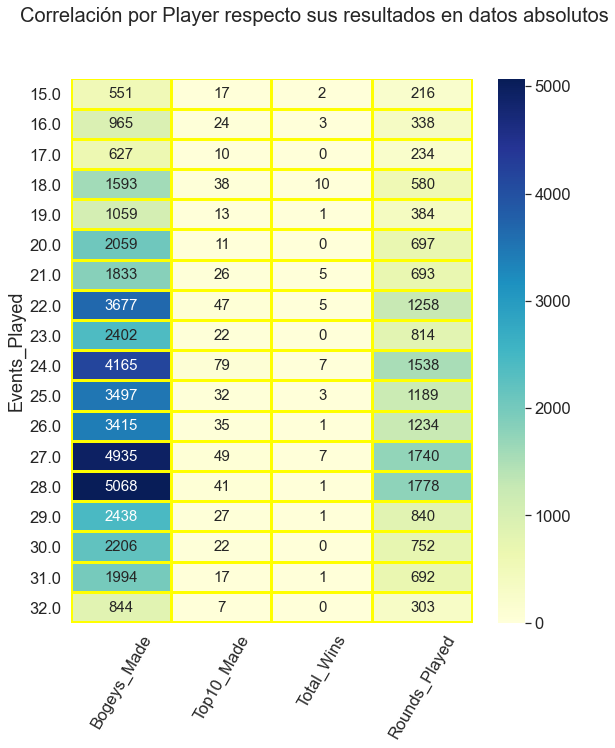

In [173]:
# Eliminamos la fila 'Age' ya que como hemos observado anteriormente, la edad de los Players no tiene una correlación con sus
# resultados.

file_plot= pd.DataFrame(file_df, columns=['Bogeys_Made','Top10_Made','Total_Wins','Rounds_Played'])
sns.set(rc={'figure.figsize':(9,10)}, font_scale=1.5)
plt.suptitle("Correlación por Player respecto sus resultados en datos absolutos", fontsize=20)
a=sns.heatmap(file_plot, linewidths=2, linecolor='yellow', annot=True, annot_kws={"size": 15}, cmap="YlGnBu", fmt='.0f')
a.set_yticklabels(a.get_yticklabels(), rotation=0)
a.set_xticklabels(a.get_xticklabels(), rotation=60)
plt.show()

### <span style="color:black">Exercici 4.</span>

__Continuant amb les dades de tema esportiu, selecciona un atribut i calcula la mitjana geomètrica i la mitjana harmònica:__ <span style="color:blue">__[X] Fet__</span>

In [179]:
from scipy import stats
from scipy.stats import gmean

In [184]:
file_=file.dropna() #Tenemos que eliminar los NAN ya que de lo contrario la Media Geométrica será igual a NAN, y la Media 
                    # Armónica no se podrá calcular ya que todos los elementos deben ser igual o mayor a zero.

In [185]:
# MEDIA GEOMÉTRICA #

stats.gmean(file_['Bogeys_Made'])

218.11267750564465

In [186]:
# MEDIA ARMÓNICA #

stats.hmean(file_['Bogeys_Made'])

213.83188507668834